In [2]:
#pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 3.9 MB/s eta 0:00:00


In [5]:
from snscrape.modules import twitter
import pandas as pd

In [22]:
# Importing necessary libraries
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating a list to append all tweet attributes(data)
tweets = []

# Creating query
query = '#WorldCup2022 lang:en since:2022-11-20 until:2022-11-21'
q = sntwitter.TwitterSearchScraper(query)

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(q.get_items()):
    if i>1000:
        break
    tweets.append([tweet.user.username,tweet.user.followersCount, tweet.user.location, tweet.date, tweet.likeCount, tweet.content, tweet.replyCount, tweet.retweetCount])

<ipython-input-22-d36760e54f28>:16: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.user.username,tweet.user.followersCount, tweet.user.location, tweet.date, tweet.likeCount, tweet.content, tweet.replyCount, tweet.retweetCount])


In [23]:
# Converting data to dataframe
tweets_df = pd.DataFrame(tweets,columns=["username","user followers", "user location", "tweet date", "likeCount", "content", "replyCount", "retweetCount"])
tweets_df

,username,user followers,user location,tweet date,likeCount,content,replyCount,retweetCount
0,OmarYKhan,5116,Toronto,2022-11-20 23:59:01+00:00,3,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,1,0
1,abdellatif_adel,2689,"New York, USA",2022-11-20 23:58:41+00:00,1,Worth reading while watching #WorldCup2022 htt...,0,0
2,RookieArmy8,12,,2022-11-20 23:58:33+00:00,1,Golden Maknae shinning bright\n\nhttps://t.co/...,0,0
3,Rahmat110313,194,,2022-11-20 23:58:28+00:00,0,"If the BBC cares so much about human rights, h...",0,0
4,TheZanji,28,Ireland,2022-11-20 23:57:32+00:00,0,"And like, will the mexican fans be able to scr...",0,0
...,...,...,...,...,...,...,...,...
996,ILQLive,61824,"Doha, Qatar",2022-11-20 20:12:57+00:00,29,H.H. the Amir Sheikh Tamim bin Hamad Al Thani ...,2,1
997,SepehrAbedian,207,Gold Coast Australia,2022-11-20 20:12:31+00:00,2,#WorldCup2022\n\nIran's Ehsan Hajsafi speaks o...,0,1
998,loadin76,269,Las Vegas,2022-11-20 20:12:16+00:00,7,This #WorldCup2022 be cray https://t.co/GkKKfB...,0,0
999,Maaryam24,9145,"Doha, Qatar",2022-11-20 20:12:14+00:00,3,20/11/2022.\n\nFeels like a dream🇶🇦🤩.\n#WorldC...,0,0


In [26]:
# # Cleaning the Tweets

In [27]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
stp_words = stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
pd.DataFrame(tweets_df["content"])

,content
0,Amazing @CanadaSoccerEN #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986. Can’t wait to see these boys in action!\n\nThis is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8
1,Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU
2,Golden Maknae shinning bright\n\nhttps://t.co/4AyZbzGTX4\n#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK \n@BTS_twt
3,"If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony??"
4,"And like, will the mexican fans be able to scream ""PUTO"" now? Or is that too homophobic for qatar? @FIFAWorldCup #WorldCup2022"
...,...
996,H.H. the Amir Sheikh Tamim bin Hamad Al Thani is seen with HRH Saudi Crown Prince Prime Minister of Saudi Arabia Mohammed bin Salman Al Saud at the opening ceremony of the World Cup.\n\n#ILoveQatar #Qatar2022 #WorldCup #fifaworldcup #NowIsAll #fifaworldcup2022 #worldcup2022 https://t.co/VCVg316uN9
997,#WorldCup2022\n\nIran's Ehsan Hajsafi speaks out over conditions in his home country https://t.co/LjHDkd6Tmi
998,This #WorldCup2022 be cray https://t.co/GkKKfBcKAX
999,20/11/2022.\n\nFeels like a dream🇶🇦🤩.\n#WorldCup2022\n#Qatar2022 https://t.co/ldhUPDSaSN


In [31]:
from textblob import TextBlob
from wordcloud import WordCloud

In [43]:
def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet = re.sub(r"(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)","",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"

In [44]:
tweets_df['cleanedTweets'] = tweets_df['content'].apply(TweetCleaning)
tweets_df['tPolarity'] = tweets_df['cleanedTweets'].apply(calPolarity)
tweets_df['tSubjectivity'] = tweets_df['cleanedTweets'].apply(calSubjectivity)
tweets_df['segmentation'] = tweets_df['tPolarity'].apply(segmentation)
tweets_df.head()

,username,user followers,user location,tweet date,likeCount,content,replyCount,retweetCount,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,OmarYKhan,5116,Toronto,2022-11-20 23:59:01+00:00,3,Amazing @CanadaSoccerEN #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986. Can’t wait to see these boys in action!\n\nThis is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8,1,0,Amazing . Shows much face Canada men’s national team changed since last World Cup entry 1986. Can’t wait see boys action! This Canada: FIFA World Cup Opening Video,0.23125,0.316667,positive
1,abdellatif_adel,2689,"New York, USA",2022-11-20 23:58:41+00:00,1,Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU,0,0,Worth reading watching ://,0.30000,0.100000,positive
2,RookieArmy8,12,,2022-11-20 23:58:33+00:00,1,Golden Maknae shinning bright\n\nhttps://t.co/4AyZbzGTX4\n#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK \n@BTS_twt,0,0,Golden Maknae shinning bright #전정국 #정국 #방탄소년단 _twt,0.50000,0.650000,positive
3,Rahmat110313,194,,2022-11-20 23:58:28+00:00,0,"If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony??",0,0,"If BBC cares much human rights, homosexual rights, women rights say opening ceremony?? Why saying opening ceremony?? Why BBC censor ??",0.00000,0.100000,neutral
4,TheZanji,28,Ireland,2022-11-20 23:57:32+00:00,0,"And like, will the mexican fans be able to scream ""PUTO"" now? Or is that too homophobic for qatar? @FIFAWorldCup #WorldCup2022",0,0,"And like, mexican fans able scream ""PUTO"" now? Or homophobic qatar?",0.25000,0.312500,positive


In [45]:
# # Analysis and Visualization

In [46]:
tweets_df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,137
neutral,440
positive,424


In [47]:
# top 3 most positive
tweets_df.sort_values(by=['tPolarity'],ascending=False).head(3)

,username,user followers,user location,tweet date,likeCount,content,replyCount,retweetCount,cleanedTweets,tPolarity,tSubjectivity,segmentation
301,Birdman0715,423,"Chicago, IL",2022-11-20 22:50:19+00:00,1,ONE MORE DAY!!! Tomorrow is the day!! 🇺🇸🔥 #WorldCup2022 https://t.co/TogDrWAhFF,0,0,ONE MORE DAY!!! Tomorrow day!! 🇺🇸🔥 ://,1.0,0.50,positive
242,BenGAli121,809,"Nomansland, England",2022-11-20 23:00:59+00:00,0,Best of the #Qatar 2022 opening ceremony #WorldCup2022 #FIFAWorldCup https://t.co/4puRwf1EwQ,0,0,Best ://,1.0,0.30,positive
441,SAnderJ19_,1011,,2022-11-20 22:32:39+00:00,1,"🎊 #Giveaway!\n#Qatar2022 \n#WorldCup2022 ⚽🏆\n$BIRB #BIRB 🐦🦜\n\nExcellent Team!🛸☀️\n\n🧵Tasks finished!\n👪 Tags ⬇️\n- @RNeylii_\n- @Betzagricel\n- @Marcohpa\n- @xWolmer\n- @LexVlogs19\n\nWherever you are, I will always support you 💸\nThey are the best community in the world🎊✨",0,0,"🎊 ! ⚽🏆 $BIRB 🐦🦜 Excellent Team!🛸☀️ 🧵Tasks finished! 👪 Tags ⬇️ - _ - - - - Wherever are, I always support 💸 They best community world🎊✨",1.0,0.65,positive


In [48]:
# top 3 most negative
tweets_df.sort_values(by=['tPolarity'],ascending=True).head(3)

,username,user followers,user location,tweet date,likeCount,content,replyCount,retweetCount,cleanedTweets,tPolarity,tSubjectivity,segmentation
903,LKKesse,5302,"Las Vegas, NV",2022-11-20 20:40:24+00:00,0,Worst #WorldCup opener gone in the history books. #Qatar has no business hosting left alone playing in the #2022FIFAWorldCup !!! @FOXSports #WorldCup2022 #TeamGhana #Teamusa,0,0,Worst . !!!,-1.0,1.0,negative
238,Zezygah,1203,,2022-11-20 23:01:32+00:00,0,"And starts, the worst World Cup of history! The Cup who everyone will remember as the most watched over the world, because be there is horrible! #WorldCup2022",0,0,"And starts, worst World Cup history! The Cup everyone remember watched world, horrible!",-1.0,1.0,negative
749,maa_shaaa_,12,"London, England",2022-11-20 21:31:43+00:00,0,The regime of the Islamic Republic of Iran has committed terrible crimes with war weapons and missiles and is killing Iranian people and children.\n#fifa2022\n#worldcup2022\n#worldcup\n#worldcup2022qatar\n#worldcupqatar\n#fifa2022qatar\n#qatar2022 https://t.co/f6m1cI6eTN,0,0,The regime Islamic Republic Iran committed terrible crimes war weapons missiles killing Iranian people children. ://,-1.0,1.0,negative


In [73]:
# recuperer les tweets les plus populaires
tweets_df.sort_values(by=['likeCount'],ascending=False).head(3)

,username,user followers,user location,tweet date,likeCount,content,replyCount,retweetCount,cleanedTweets,tPolarity,tSubjectivity,segmentation
520,soompi,3552074,Worldwide,2022-11-20 22:20:55+00:00,5780,WATCH: BTS's #Jungkook Performs At #WorldCup2022 Opening Ceremony\nhttps://t.co/QHXhcQdH79 https://t.co/3eZskVQtba,48,1279,WATCH: BTS's ://://,0.0,0.0,neutral
207,OnlinePalEng,104377,Global,2022-11-20 23:06:08+00:00,3092,"""It's Palestine...""\n\nLebanese fans refuse to be interviewed by an Israeli TV reporter after he said that he is from 'Israel' at #WorldCup2022 in Qatar. https://t.co/shdWDn4ZvC",90,933,"""It's P"" Lebanese fans refuse interviewed Israeli TV reporter said 'Israel' .",0.0,0.0,neutral
655,Sea__Solitude,1025,Ireland,2022-11-20 21:56:28+00:00,2089,@LinahAlsaafin Never forget when #IsraeliApartheid murdered 4 children playing football in Gaza.\n#WorldCup2022 #IsraeliTerrorism https://t.co/wIQH4lEa95,21,554,Never forget . ://,0.0,0.0,neutral


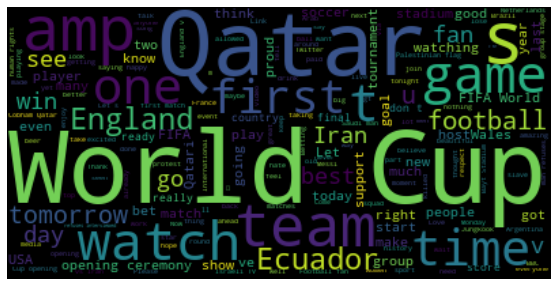

In [60]:
import matplotlib.pyplot as plt

consolidated = ' '.join(word for word in tweets_df['cleanedTweets'])

wordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=119).generate(consolidated)

plt.figure(figsize=(20,5))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
tweets_df.groupby('segmentation').count()

,username,user followers,user location,tweet date,likeCount,content,replyCount,retweetCount,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,,,,,,,,
negative,137,137,137,137,137,137,137,137,137,137,137
neutral,440,440,440,440,440,440,440,440,440,440,440
positive,424,424,424,424,424,424,424,424,424,424,424


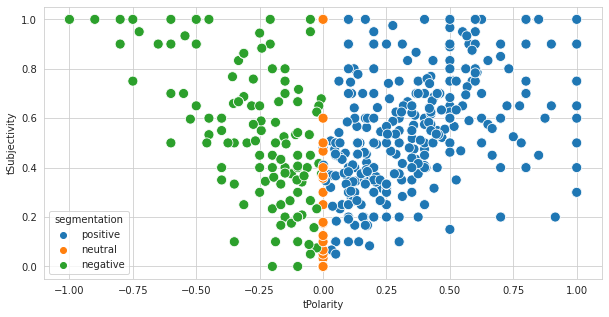

In [55]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=tweets_df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

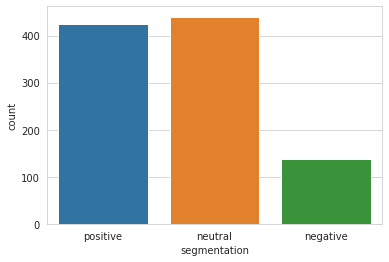

In [57]:
sns.countplot(data=tweets_df,x='segmentation')

In [59]:
positive = round(len(tweets_df[tweets_df.segmentation == 'positive'])/len(tweets_df)*100,1)
negative = round(len(tweets_df[tweets_df.segmentation == 'negative'])/len(tweets_df)*100,1)
neutral = round(len(tweets_df[tweets_df.segmentation == 'neutral'])/len(tweets_df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['mayWin', 'mayLoose', 'notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,mayWin,42.4
1,mayLoose,13.7
2,notSure,44.0


In [71]:
# recuperer les tweets à propos du maroc
for i in tweets_df["cleanedTweets"]:
  if 'Morocco' in i:
    print(i)

Senegal? Ghana? Morocco? Which African team biggest potential ? -
Morocco vs Croatia Live Stream Live On: 🆚Morocco vs Croatia 🗓️Wednesday, November 23, 2022 ⏰10:00 AM GMT 🏟️Al Bayt Stadium, Al Khor, Qatar 🏆FIFA World Cup 2022 ://
‘Morocco’s Guardiola’ leads way African coaches Qatar World Cup é ://
